In [1]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [6]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

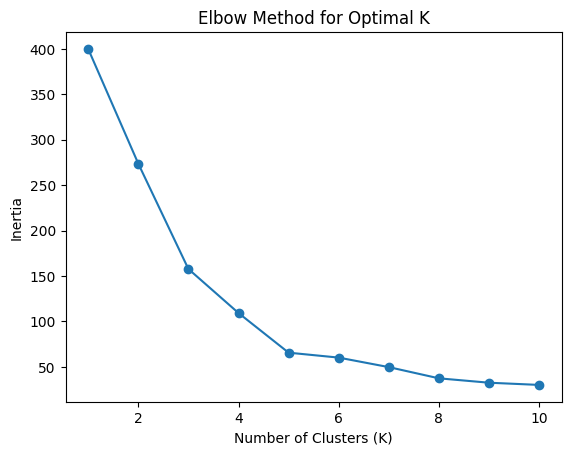

In [7]:
inertia_list=[]

for k in range(1, 11):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)

plt.plot(range(1, 11), inertia_list, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [8]:
k=5
kmeans=KMeans(n_clusters=k, random_state=42)
labels=kmeans.fit_predict(X_scaled)

df["Cluster"]=labels

In [9]:
score=silhouette_score(X_scaled,labels)
print("Silhouette Score:",score)

Silhouette Score: 0.5546571631111091


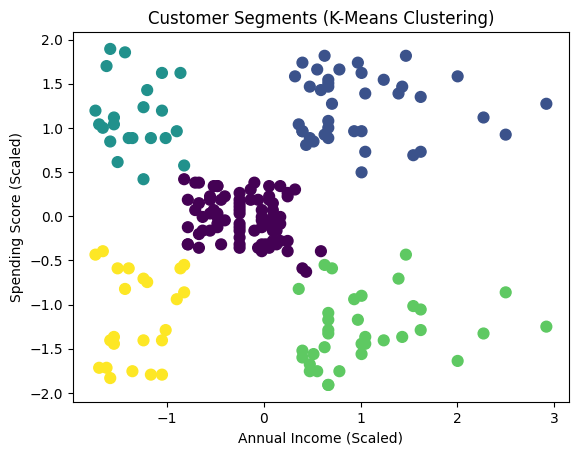

In [10]:
plt.scatter(X_scaled[:, 0],X_scaled[:, 1],c=labels,s=60)
plt.xlabel("Annual Income (Scaled)")
plt.ylabel("Spending Score (Scaled)")
plt.title("Customer Segments (K-Means Clustering)")
plt.show()